In [1]:
from sklearn.datasets import load_iris
iris = load_iris()


In [2]:
#Supervised Learning Tutorial:

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names


In [3]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2) 
#test_size to control the split
print(X_train.shape) #how many rows and columns
print(X_test.shape)


(120, 4)
(30, 4)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #how many data points around to observer
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
predicted_species = [iris.target_names[p] for p in y_pred]


In [11]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,y_pred))

0.9333333333333333


In [6]:
sample = [[3,5,4,2],[2,3,5,4]]
preds = knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
pred_species

[np.str_('versicolor'), np.str_('virginica')]

In [7]:
import joblib

joblib.dump(knn, "iris_model.joblib")

['iris_model.joblib']

In [13]:
model = joblib.load("iris_model.joblib")
sample = [[5,3,1,4],[6,1,2,4]]
preds = model.predict(sample)
predicted_from_sample = [iris.target_names[p] for p in preds]
predicted_from_sample

[np.str_('setosa'), np.str_('versicolor')]

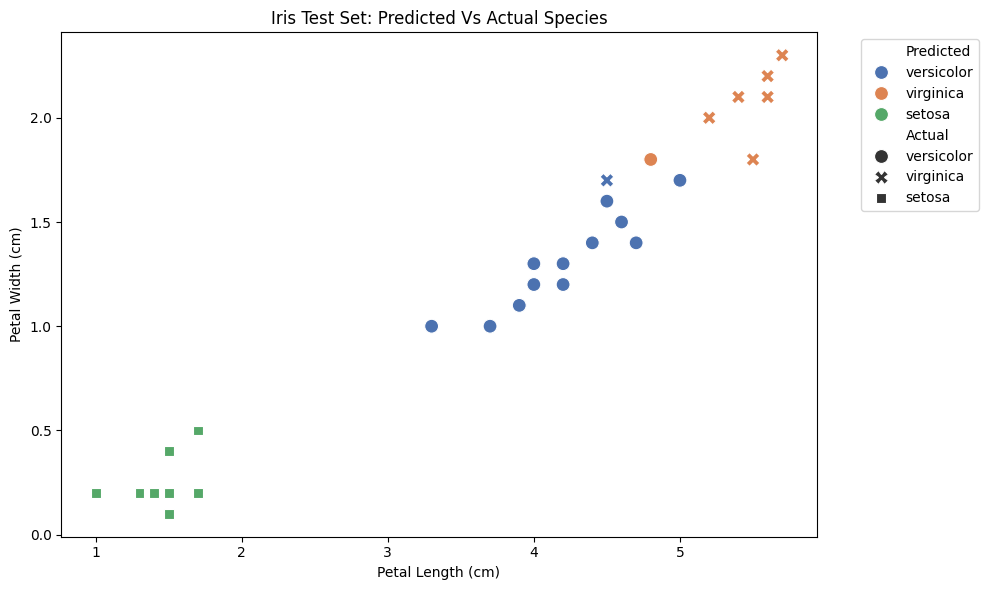

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_plot = pd.DataFrame(X_test, columns=feature_names)
df_plot['Predicted'] = [target_names[i] for i in y_pred]
df_plot['Actual'] = [target_names[i] for i in Y_test]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Predicted',
    style='Actual',
    s=100,
    palette='deep'
)

plt.title('Iris Test Set: Predicted Vs Actual Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')


plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()
